importing Jupyter notebook from week1_analysis.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
Youngest Age:  10.0
Oldest Age:  97.0


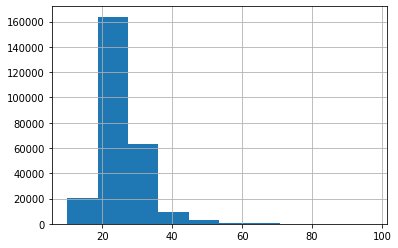

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import import_ipynb
from week1_analysis import summer_events, winter_events

In [4]:
#Summer Olympics:
summer_medal_count = pysqldf('''
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               summer_events
                             GROUP BY
                               Year 
                                   ''')

In [5]:
#Winter Olympics:
winter_medal_count = pysqldf('''
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               winter_events
                             GROUP BY
                               Year 
                                   ''')

I made two tables to count the total number of medals in the winter and summer olympics categorized by the year. I am going to calculate the correlation coefficient for the medals from both the summer and winter olympics. The summer olympics table was modified later because the winter olympics began later than the summer

In [6]:
print(summer_medal_count.head())


   Year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1896          380          143          62            43            38
1  1900         1936          604         201           228           175
2  1904         1301          486         173           163           150
3  1906         1733          458         157           156           145
4  1908         3101          831         294           281           256


In [7]:
print(winter_medal_count.head())


   Year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1924          460          130          55            38            37
1  1928          582           89          30            28            31
2  1932          352           92          32            32            28
3  1936          895          108          36            37            35
4  1948         1075          135          41            48            46


In [8]:
print(summer_medal_count)


    Year  total_count  medal_count  gold_count  silver_count  bronze_count
0   1896          380          143          62            43            38
1   1900         1936          604         201           228           175
2   1904         1301          486         173           163           150
3   1906         1733          458         157           156           145
4   1908         3101          831         294           281           256
5   1912         4040          941         326           315           300
6   1920         4292         1308         493           448           367
7   1924         5233          832         277           281           274
8   1928         4992          734         245           239           250
9   1932         2969          647         229           214           204
10  1936         6506          917         312           310           295
11  1948         6405          852         289           284           279
12  1952         8270    

In [9]:
summer_medal_count_new = summer_medal_count[7:]

In [10]:
print(summer_medal_count_new)


    Year  total_count  medal_count  gold_count  silver_count  bronze_count
7   1924         5233          832         277           281           274
8   1928         4992          734         245           239           250
9   1932         2969          647         229           214           204
10  1936         6506          917         312           310           295
11  1948         6405          852         289           284           279
12  1952         8270          897         306           291           300
13  1956         5127          893         302           293           298
14  1960         8119          911         309           294           308
15  1964         7702         1029         347           339           343
16  1968         8588         1057         359           340           358
17  1972        10304         1215         404           392           419
18  1976         8641         1320         438           434           448
19  1980         7191    

In [11]:
import numpy as np

In [12]:
x_simple = winter_medal_count.medal_count
y_simple = summer_medal_count_new.medal_count
my_rho = np.corrcoef(x_simple, y_simple)

In [13]:
print(my_rho)


[[1.         0.94141801]
 [0.94141801 1.        ]]


The coefficient is very very high and thus, there is a strong correlation between the performances in the winter and summer olympics

In [14]:
std_medal_count_summer_olympics = np.std(y_simple)
std_medal_count_winter_olympics = np.std(x_simple)

In [15]:
print("std_medal_count_summer_olympics =",std_medal_count_summer_olympics)
print("std_medal_count_winter_olympics =",std_medal_count_winter_olympics)

std_medal_count_summer_olympics = 475.323015441357
std_medal_count_winter_olympics = 152.56899942903493


The standard deviation for the summer is triple of that for the winter olympics, thus the performance will change more for the summer Olympics athletes

In [16]:
#Summer Olympics:
summer_medal_count_age = pysqldf('''
                         SELECT
                             Age,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               summer_events
                             GROUP BY
                               Age 
                                   ''')

In [17]:
#Winter Olympics:
winter_medal_count_age = pysqldf('''
                         SELECT
                             Age,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               winter_events
                             GROUP BY
                               Age 
                                   ''')

I made two tables to count the total number of medals in the winter and summer olympics categorized by the age for the age range of 11-54. I am going to calculate the correlation coefficient for the medals from both the summer and winter olympics. The summer olympics table was modified later because the winter olympics athletes and summer athletes have different ages at which they start certain events

In [37]:
print(summer_medal_count_age.head())

    Age  total_count  medal_count  gold_count  silver_count  bronze_count
0   NaN         9189          721         139           295           287
1  10.0            1            1           0             0             1
2  11.0            6            1           0             1             0
3  12.0           31            6           0             3             3
4  13.0          172           15           6             7             2


In [38]:
print(winter_medal_count_age.head())

    Age  total_count  medal_count  gold_count  silver_count  bronze_count
0   NaN          285           11           9             0             2
1  11.0            7            0           0             0             0
2  12.0            8            0           0             0             0
3  13.0           15            1           1             0             0
4  14.0           54            2           1             0             1


In [39]:
print(summer_medal_count_age)

     Age  total_count  medal_count  gold_count  silver_count  bronze_count
0    NaN         9189          721         139           295           287
1   10.0            1            1           0             0             1
2   11.0            6            1           0             1             0
3   12.0           31            6           0             3             3
4   13.0          172           15           6             7             2
..   ...          ...          ...         ...           ...           ...
70  81.0            2            0           0             0             0
71  84.0            1            0           0             0             0
72  88.0            3            0           0             0             0
73  96.0            1            0           0             0             0
74  97.0            1            0           0             0             0

[75 rows x 6 columns]


In [40]:
print(winter_medal_count_age)

     Age  total_count  medal_count  gold_count  silver_count  bronze_count
0    NaN          285           11           9             0             2
1   11.0            7            0           0             0             0
2   12.0            8            0           0             0             0
3   13.0           15            1           1             0             0
4   14.0           54            2           1             0             1
5   15.0          174           18           5             7             6
6   16.0          432           24           7            10             7
7   17.0          802           47          16            14            17
8   18.0         1359           90          31            24            35
9   19.0         2089          166          43            63            60
10  20.0         2808          252          76            81            95
11  21.0         3645          314         100           113           101
12  22.0         3962    

In [41]:
summer_medal_count_age_new = summer_medal_count_age[2:46]

In [42]:
print(summer_medal_count_age_new)

     Age  total_count  medal_count  gold_count  silver_count  bronze_count
2   11.0            6            1           0             1             0
3   12.0           31            6           0             3             3
4   13.0          172           15           6             7             2
5   14.0          783           73          26            30            17
6   15.0         2029          178          70            60            48
7   16.0         3420          326         109           119            98
8   17.0         4574          487         183           149           155
9   18.0         6793          770         249           270           251
10  19.0         9554         1203         416           378           409
11  20.0        12450         1752         598           557           597
12  21.0        15519         2370         825           747           798
13  22.0        16852         2752         959           857           936
14  23.0        17521    

In [43]:
winter_medal_count_age_new = winter_medal_count_age[1:45]

In [44]:
print(winter_medal_count_age_new)

     Age  total_count  medal_count  gold_count  silver_count  bronze_count
1   11.0            7            0           0             0             0
2   12.0            8            0           0             0             0
3   13.0           15            1           1             0             0
4   14.0           54            2           1             0             1
5   15.0          174           18           5             7             6
6   16.0          432           24           7            10             7
7   17.0          802           47          16            14            17
8   18.0         1359           90          31            24            35
9   19.0         2089          166          43            63            60
10  20.0         2808          252          76            81            95
11  21.0         3645          314         100           113           101
12  22.0         3962          407         137           125           145
13  23.0         4354    

In [45]:
x_simple_age = winter_medal_count_age_new.medal_count
y_simple_age = summer_medal_count_age_new.medal_count
my_rho_age = np.corrcoef(x_simple_age, y_simple_age)

In [46]:
print(my_rho_age)

[[1.         0.97913386]
 [0.97913386 1.        ]]


The standard deviation is .979, which indicates a very high correlation between the performance of athletes by their age for both the summer and winter olympics

In [47]:
std_medal_count_summer_olympics_age = np.std(y_simple_age)
std_medal_count_winter_olympics_age = np.std(x_simple_age)

In [48]:
print("std_medal_count_summer_olympics =",std_medal_count_summer_olympics_age)
print("std_medal_count_winter_olympics =",std_medal_count_winter_olympics_age)

std_medal_count_summer_olympics = 937.4098356091075
std_medal_count_winter_olympics = 170.87815846772904


The standard deviation for the summer olympics is almost 9 times that of the winter olympics for the age range 11-54, so the performance changes more the older an athlete gets in the Summer Olympics

Overall, I think there is much more changes in performance and medal counts in the Summer Olympics due to the larger number of events, number of athletes, and wider age range than that of the winter olympics which is not as large nor as old as the summer Olympics.